## Part1: Web scrapping

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\momen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
def scrape_books():
    books = []

    for page_num in range(1, 50):
        url = f"https://books.toscrape.com/catalogue/page-{page_num}.html"
        response = requests.get(url)

        if response.status_code != 200:
            print(f"Failed to get page: {url}")
            continue

        soup = BeautifulSoup(response.content, 'html.parser')
        book_elements = soup.find_all('article', class_='product_pod')

        for book_element in book_elements:
            book = parse_book_element(book_element)
            if book is not None:
                books.append(book)
                # print(book['title'])

    return books

def parse_book_element(book_element):
    try:
        image_element = book_element.find('img')
        title = image_element['alt']

        rating_element = book_element.find('p')
        rating = rating_element['class'][1]

        price_element = book_element.find('p', class_='price_color')
        price = float(price_element.text[1:])

        return {'title': title, 'rating': rating, 'price': price}
    except Exception as e:
        print(f"Failed to parse book element. Error: {e}")
        return None

def save_to_csv(books):
    df = pd.DataFrame(books)
    df.to_csv('books_dataset.csv', index=False)

def main():
    books = scrape_books()
    save_to_csv(books)

if __name__ == "__main__":
    main()


## Part 2:  Data science 

In [2]:
# Load the new data
df = pd.read_csv('books_dataset.csv')

# Display the first few rows of the DataFrame
df.head()

,title,rating,price
0,A Light in the Attic,Three,51.77
1,Tipping the Velvet,One,53.74
2,Soumission,One,50.10
3,Sharp Objects,Four,47.82
4,Sapiens: A Brief History of Humankind,Five,54.23


In [3]:
# Display the last few rows of the DataFrame
df.tail()

,title,rating,price
975,Icing (Aces Hockey #2),Four,40.44
976,"Hawkeye, Vol. 1: My Life as a Weapon (Hawkeye #1)",Three,45.24
977,Having the Barbarian's Baby (Ice Planet Barbar...,Four,34.96
978,"Giant Days, Vol. 1 (Giant Days #1-4)",Four,56.76
979,"Fruits Basket, Vol. 1 (Fruits Basket #1)",Five,40.28


In [4]:
len(df)

980

In [5]:

# Create a mapping dictionary to convert star ratings to numeric
star_rating_mapping = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

# Replace star ratings with numeric values
df['rating'] = df['rating'].map(star_rating_mapping)

# Display the first few rows of the cleaned DataFrame
df.head()


,title,rating,price
0,A Light in the Attic,3,51.77
1,Tipping the Velvet,1,53.74
2,Soumission,1,50.10
3,Sharp Objects,4,47.82
4,Sapiens: A Brief History of Humankind,5,54.23


In [6]:
# Create a histogram of book prices
plt.figure(figsize=(10, 6))
sns.histplot(df_new['price'], kde=True, bins=20)
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

NameError: name 'df_new' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
# Create a bar plot of average book prices by star rating
plt.figure(figsize=(10, 6))
average_prices_new = df.groupby('rating')['price'].mean().sort_values()
sns.barplot(x=average_prices_new.index, y=average_prices_new.values, palette='viridis')
plt.title('Average Book Prices by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Price')
plt.show()

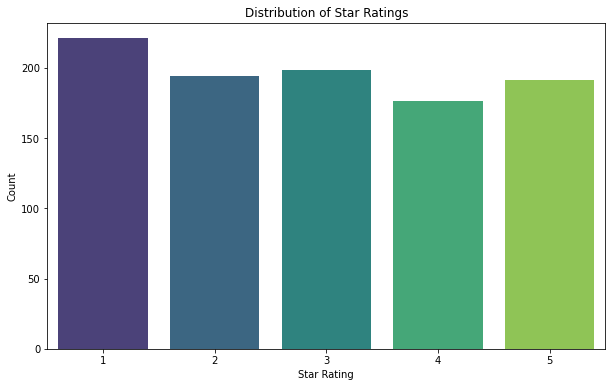

In [7]:
# Create a bar plot of the distribution of star ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


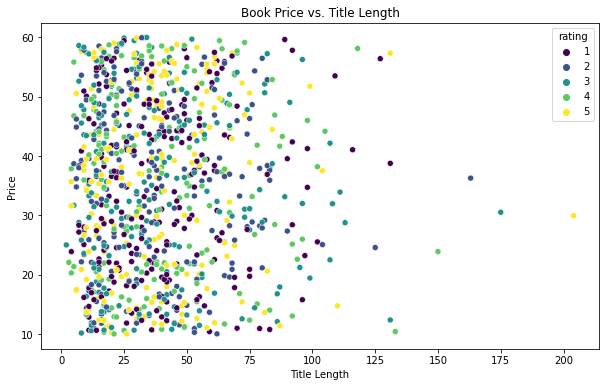

In [8]:
# Create a new column for the length of the book title
df['title_length'] = df['title'].apply(len)

# Create a scatter plot of book price vs. title length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='title_length', y='price', data=df, hue='rating', palette='viridis')
plt.title('Book Price vs. Title Length')
plt.xlabel('Title Length')
plt.ylabel('Price')
plt.show()
